In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [4]:
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])
fraud['income']=label_encoder.fit_transform(fraud['income'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [6]:
x=fraud.iloc[:,0:6]
y=fraud.iloc[:,-1]

In [7]:
fraud['income'].unique()

array([0, 1])

In [9]:
fraud.income.value_counts()

0    476
1    124
Name: income, dtype: int64

In [10]:
colnames=list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'income']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

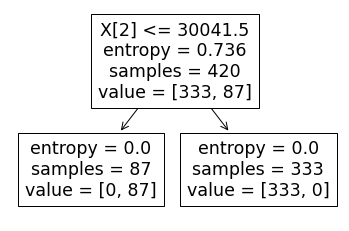

In [13]:
tree.plot_tree(model);

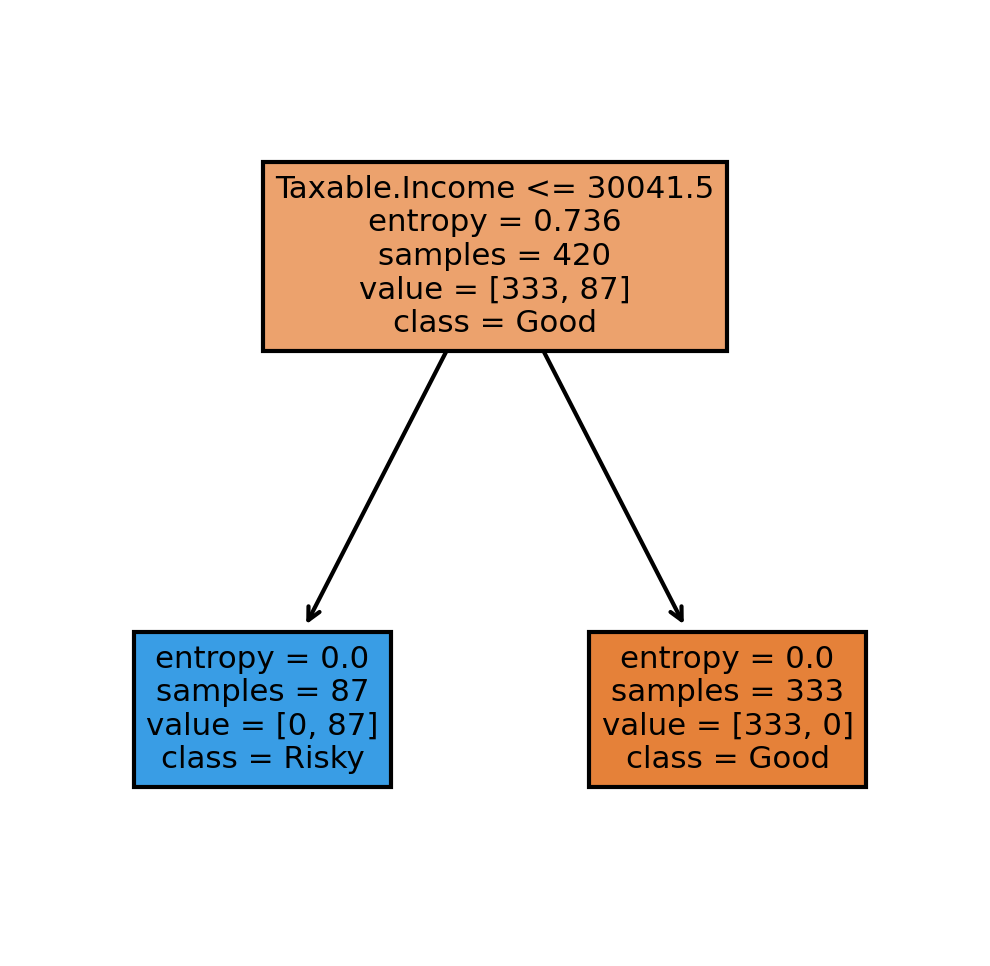

In [14]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [15]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    143
1     37
dtype: int64

In [16]:
preds

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

In [17]:
pd.crosstab(y_test,preds)

col_0,0,1
income,,
0,143,0
1,0,37


In [18]:
np.mean(preds==y_test)

1.0

In [19]:
#using gini criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [20]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0